In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Analysing individual player statistics in the NBA 

In [33]:
stats = pd.read_csv('Seasons_Stats.csv')

In [34]:
stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Preparing the data for analysing

In [35]:
df = stats[stats['Year']>=2014]
df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22253,22253,2014.0,Quincy Acy,SF,23.0,TOT,63.0,0.0,847.0,10.1,...,0.660,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,171.0
22254,22254,2014.0,Quincy Acy,SF,23.0,TOR,7.0,0.0,61.0,17.2,...,0.625,5.0,10.0,15.0,4.0,4.0,3.0,2.0,8.0,19.0
22255,22255,2014.0,Quincy Acy,SF,23.0,SAC,56.0,0.0,786.0,9.6,...,0.667,67.0,134.0,201.0,24.0,19.0,23.0,28.0,114.0,152.0
22256,22256,2014.0,Steven Adams,C,20.0,OKC,81.0,20.0,1197.0,11.2,...,0.581,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265.0
22257,22257,2014.0,Jeff Adrien,PF,27.0,TOT,53.0,12.0,961.0,17.4,...,0.639,102.0,204.0,306.0,38.0,24.0,36.0,39.0,108.0,362.0


In [36]:
df = df[['Year','Player','Pos','Age','G','PER',
                   'MP','PTS','AST','TRB','TOV','BLK','STL']]

In [37]:
df.head()

,Year,Player,Pos,Age,G,PER,MP,PTS,AST,TRB,TOV,BLK,STL
22253,2014.0,Quincy Acy,SF,23.0,63.0,10.1,847.0,171.0,28.0,216.0,30.0,26.0,23.0
22254,2014.0,Quincy Acy,SF,23.0,7.0,17.2,61.0,19.0,4.0,15.0,2.0,3.0,4.0
22255,2014.0,Quincy Acy,SF,23.0,56.0,9.6,786.0,152.0,24.0,201.0,28.0,23.0,19.0
22256,2014.0,Steven Adams,C,20.0,81.0,11.2,1197.0,265.0,43.0,332.0,71.0,57.0,40.0
22257,2014.0,Jeff Adrien,PF,27.0,53.0,17.4,961.0,362.0,38.0,306.0,39.0,36.0,24.0


In [38]:
a = ['MPG','PPG','APG','RPG','TOPG','BPG','SPG']
b = ['MP','PTS','AST','TRB','TOV','BLK','STL'] 

for i,j in zip(a,b):
    df[i] = df[j] / df['G']


In [39]:
df.drop(b,axis=1,inplace=True)

In [40]:
df.head()

,Year,Player,Pos,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG
22253,2014.0,Quincy Acy,SF,23.0,63.0,10.1,13.444444,2.714286,0.444444,3.428571,0.476190,0.412698,0.365079
22254,2014.0,Quincy Acy,SF,23.0,7.0,17.2,8.714286,2.714286,0.571429,2.142857,0.285714,0.428571,0.571429
22255,2014.0,Quincy Acy,SF,23.0,56.0,9.6,14.035714,2.714286,0.428571,3.589286,0.500000,0.410714,0.339286
22256,2014.0,Steven Adams,C,20.0,81.0,11.2,14.777778,3.271605,0.530864,4.098765,0.876543,0.703704,0.493827
22257,2014.0,Jeff Adrien,PF,27.0,53.0,17.4,18.132075,6.830189,0.716981,5.773585,0.735849,0.679245,0.452830


In [41]:
df['Pos'].value_counts()

SG       519
PF       501
PG       497
SF       475
C        428
SG-PG      3
SG-SF      3
PF-C       2
SF-PF      2
PF-SF      2
PG-SG      2
SF-SG      1
Name: Pos, dtype: int64

1. Top 10 players to score most points per game in the past 4 NBA seasons

In [42]:
group = df.groupby('Player').mean()['PPG'].reset_index()
group.sort_values('PPG',ascending=False).head(10)

,Player,PPG
307,James Harden,27.697141
417,Kevin Durant,27.670238
617,Russell Westbrook,26.246777
449,LeBron James,26.014826
657,Stephen Curry,25.782477
173,DeMarcus Cousins,25.469405
45,Anthony Davis,24.356067
99,Carmelo Anthony,23.961178
143,Damian Lillard,23.421585
172,DeMar DeRozan,23.374097


2. Players at which positions managed to score the most points per game?

In [59]:
group = df.groupby('Pos').mean()['PPG'].reset_index()
group.sort_values('PPG',ascending=False)

,Pos,PPG
5,PG-SG,11.978906
10,SG-PG,9.047030
4,PG,8.608857
9,SG,8.180738
6,SF,7.805666
1,PF,7.339307
0,C,7.285884
8,SF-SG,7.173333
2,PF-C,5.714286
3,PF-SF,5.322581


3. Is there a direct relationship between the points scored per game and minutes played per game? 

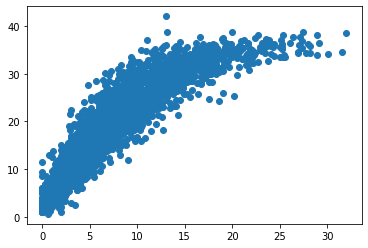

In [57]:
plt.scatter(df['PPG'],df['MPG'])
plt.show()

4. Which player and which position has the highest player efficiency rating?

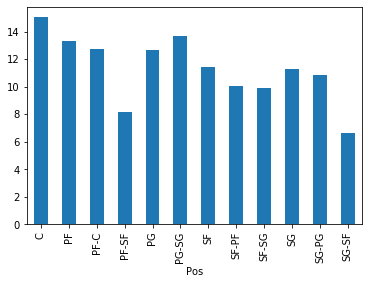

In [45]:
df.groupby("Pos").mean()['PER'].plot(kind='bar')

In [66]:
per = df.groupby("Player").mean()['PER'].reset_index()
per.sort_values('PER',ascending=False).head(10)

,Player,PER
649,Sim Bhullar,44.300
169,DeAndre Liggins,40.350
675,Thanasis Antetokounmpo,32.900
713,Tyrus Thomas,31.400
177,Demetrius Jackson,30.800
65,Boban Marjanovic,28.650
417,Kevin Durant,28.300
617,Russell Westbrook,28.000
45,Anthony Davis,27.450
449,LeBron James,27.425


5. Who is the oldest player still playing in the NBA?

In [49]:
df.sort_values(by='Age',ascending=False).head(10)

,Year,Player,Pos,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG
24184,2017.0,Vince Carter,SF,40.0,73.0,11.7,24.643836,8.027397,1.821918,3.109589,0.684932,0.493151,0.821918
22668,2014.0,Steve Nash,PG,39.0,15.0,12.2,20.866667,6.800000,5.733333,1.933333,2.066667,0.133333,0.466667
23888,2016.0,Andre Miller,PG,39.0,13.0,12.9,13.923077,4.307692,2.230769,2.076923,0.923077,0.000000,0.538462
24529,2017.0,Paul Pierce,SF,39.0,25.0,5.7,11.080000,3.240000,0.400000,1.920000,0.640000,0.200000,0.160000
23652,2016.0,Tim Duncan,C,39.0,61.0,16.9,25.180328,8.557377,2.672131,7.327869,1.475410,1.278689,0.770492
23687,2016.0,Kevin Garnett,PF,39.0,38.0,12.3,14.631579,3.210526,1.631579,3.947368,0.421053,0.263158,0.736842
23886,2016.0,Andre Miller,PG,39.0,39.0,13.4,11.820513,3.692308,2.230769,1.307692,0.948718,0.000000,0.410256
23602,2016.0,Vince Carter,SG,39.0,60.0,12.7,16.750000,6.583333,0.933333,2.433333,0.583333,0.266667,0.633333
24611,2017.0,Jason Terry,SG,39.0,74.0,9.0,18.445946,4.148649,1.324324,1.432432,0.486486,0.270270,0.608108
22455,2014.0,Derek Fisher,SG,39.0,81.0,10.1,17.629630,5.246914,1.444444,1.506173,0.604938,0.037037,0.864198


6. Since Vince Carter is the oldest existing player. Does the efficiency rating per game came down as his age increased?

In [54]:
vince = stats[(stats['Player']=='Vince Carter')]
vince['MPG'] = vince['MP']/vince['G']

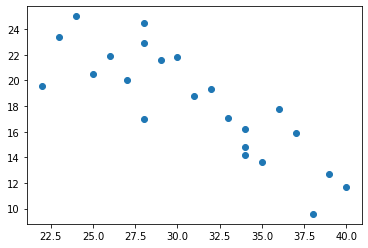

In [67]:
plt.scatter(vince['Age'],vince['PER'])

As we can see, the PER significantly reduced with his age.

In [68]:
df.to_csv('Playerstats.csv')